In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar100

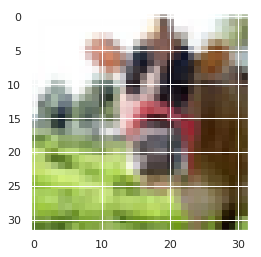

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
plt.imshow(x_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


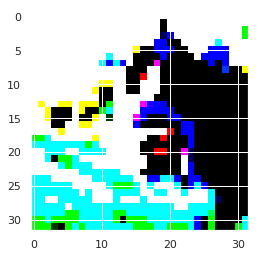

In [3]:
##### Preprocesar los datos de acuerdo a los parámetros de VGG16 #####

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
plt.imshow(x_train[0])

In [4]:
##### Cargar la base convolucional de VGG16 (Sin la parte densa) #####

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(48, 48, 3))
conv_base.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
bloc

In [5]:
##### Congelar las capas convolucionales excepto las últimas 4 #####

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x14a798e0a160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a798e0a978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a7995f9860> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x14a799878978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a799878ba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a7998774a8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x14a798de7470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a798dfc828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a798ae7e10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x14a798b01fd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x14a798ad9390> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [6]:
##### Crear el resto del modelo, agregando las capas densas #####

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
___________________________

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)